In [1]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import pandas as pd
from PIL import Image
from pytesseract import *
import numpy as np
import matplotlib.pyplot as plt#csv_img=csv_img.split(',')
import re
pandas2ri.activate()
readRDS = robjects.r['readRDS']
pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import images and save them as csv files

In [ ]:
for filename in os.listdir('100images'):
    img=image_to_data('100images//'+filename)
    csv_img=img.replace('\t',',')
    with open (filename+'.csv','w') as f:
        f.write(csv_img)

## Extract wine information on an example image

### Visualization of texts

Skipping line 83: Expected 12 fields in line 83, saw 13
Skipping line 87: Expected 12 fields in line 87, saw 13
Skipping line 164: Expected 12 fields in line 164, saw 13
Skipping line 215: Expected 12 fields in line 215, saw 13
Skipping line 261: Expected 12 fields in line 261, saw 13
Skipping line 263: Expected 12 fields in line 263, saw 13
Skipping line 270: Expected 12 fields in line 270, saw 13
Skipping line 271: Expected 12 fields in line 271, saw 13
Skipping line 289: Expected 12 fields in line 289, saw 13
Skipping line 292: Expected 12 fields in line 292, saw 13
Skipping line 295: Expected 12 fields in line 295, saw 13
Skipping line 296: Expected 12 fields in line 296, saw 13
Skipping line 301: Expected 12 fields in line 301, saw 13
Skipping line 306: Expected 12 fields in line 306, saw 13
Skipping line 309: Expected 12 fields in line 309, saw 13
Skipping line 367: Expected 12 fields in line 367, saw 13
Skipping line 376: Expected 12 fields in line 376, saw 13
Skipping line 385:

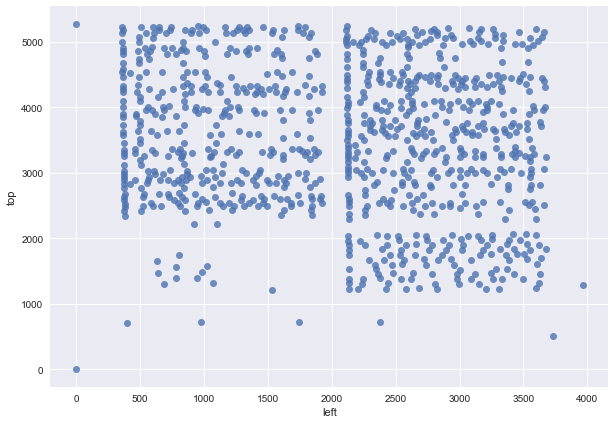

In [4]:
df=pd.read_csv('csv_img.csv',sep=',',error_bad_lines=False,engine='python')
df2=df.dropna()
df2['text'] = df['text'].str.lower()
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.regplot(x = "left", y ="top",data=df2,fit_reg=False) 
plt.show()

In [5]:
df2

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,0,5274,364,16,95,
8,5,1,2,1,1,1,0,0,4000,1282,95,
12,5,1,3,1,1,1,690,1305,361,65,95,acquire
13,5,1,3,1,1,2,1074,1313,165,52,96,the
15,5,1,3,1,2,1,784,1392,138,54,38,“gis
16,5,1,3,1,2,2,949,1396,187,53,95,now
18,5,1,3,1,3,1,644,1477,318,56,72,before
19,5,1,3,1,3,2,987,1483,289,55,91,prices
21,5,1,3,1,4,1,783,1567,216,53,94,soar
22,5,1,3,1,4,2,1027,1571,106,50,94,to


### Extract wine number from image 

In [6]:
def extractnum(Num):
    df4=pd.DataFrame()
    try: 
        tmp2=df2[(df2['text']==Num)|(df2['text']==Num.strip('.'))]['left']
    
        isclose=0
        for item in range(len(tmp2.values)):
                tmp=abs(df2['left']-np.array(tmp2)[item])<200
                isclose=isclose+tmp
        df3=df2.loc[isclose==1,:]
        df4=df3.loc[[item.isdigit()for item in df3['text']],:]
    except KeyError: 
        df4=pd.DataFrame()
    return df4  

In [7]:
extractnum('no.')

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
45,5,1,7,1,1,1,378,2420,93,40,94,237
114,5,1,8,1,1,1,377,2774,92,40,96,566
183,5,1,9,1,1,1,374,3126,94,40,94,434
236,5,1,11,1,1,1,374,3451,91,39,96,595
266,5,1,14,1,1,1,370,3725,94,40,95,288
317,5,1,16,1,1,1,370,4097,91,40,94,630
374,5,1,18,1,1,1,366,4469,92,39,94,804
399,5,1,20,1,1,1,365,4677,91,40,95,615
445,5,1,22,1,1,1,362,5000,93,39,96,114
580,5,1,25,1,9,1,2134,1824,61,40,96,20


In [9]:
def extractprice(unit):
    tmp2=df2.loc[df2['text']==unit,:]['left'] 
    isclose=0
    for item in range(len(tmp2.values)):
        tmp=abs(df2['left']-np.array(tmp2)[item])<100
        isclose=isclose+tmp
    df3=df2.loc[isclose>=1,:]

    temp=[re.findall("\d+\.\d+",item) for item in np.array(df3['text'])] 
    price=df3.loc[[bool(item) for item in temp],:]
    return price

In [10]:
extractprice('case')

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
51,5,1,7,1,1,7,1836,2436,141,41,70,48.50
120,5,1,8,1,1,7,1834,2788,141,41,92,48.50
192,5,1,9,1,2,5,1831,3208,142,41,84,48.50
205,5,1,10,1,1,10,1873,3269,100,38,96,$7.50
232,5,1,10,1,3,11,1858,3365,111,38,96,$4.49.
245,5,1,12,1,1,3,1830,3530,139,41,87,51.75
273,5,1,14,1,2,3,1828,3804,139,40,85,55.00
328,5,1,16,1,2,7,1826,4173,140,41,77,59.30
381,5,1,18,1,1,8,1824,4476,140,41,76,59.30
409,5,1,21,1,1,5,1822,4749,140,40,78,64.70


In [11]:
def extract_name(unit='bottle'): 
    df4=extractprice(unit)
    winenames=pd.DataFrame([])       
    zipped = zip(df4['left'], df4['top'])
    zippedlist=list(zipped)
    for i in range(len(zippedlist)):
        x,y=zippedlist[i]
        leftones=df2.loc[df2['left']<x,:]  #names are on the left of price
        tmp=leftones.loc[abs(leftones['top']-y)<100] #,:] #y value should be close
        
        grouped=tmp.groupby('line_num') 
        firstline=list(grouped)[0][1] #group by the line number and take the first line
    
        priceline=df4.iloc[i,:]
        blocknumber=priceline['block_num']
        new=pd.DataFrame(abs(firstline['block_num']-blocknumber))
        getindex=new.loc[new['block_num']==new['block_num'].min(),:].index #the block number of name should be close to block number of price
        t=list(getindex)

        firstline2=firstline.loc[firstline.index.isin(t),:]
        
        firstline3=firstline2.loc[~firstline2['text'].str.isdigit(),:] #remove digits
        Winename_df=pd.DataFrame(firstline3)
        winenames= winenames.append(Winename_df)
    return (winenames)

In [12]:
name_df=extract_name('bottle')
name_df2=name_df.drop_duplicates()
name_df2

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
46,5,1,7,1,1,2,510,2419,315,46,93,chateau
47,5,1,7,1,1,3,850,2423,186,44,92,belair
48,5,1,7,1,1,4,1040,2425,157,56,93,(st.
49,5,1,7,1,1,5,1224,2425,356,60,91,emilion)....
115,5,1,8,1,1,2,508,2772,315,45,93,chateau
116,5,1,8,1,1,3,848,2775,197,44,93,siran
117,5,1,8,1,1,4,1072,2777,284,59,93,(margaux)
118,5,1,8,1,1,5,1410,2817,169,8,91,......
184,5,1,9,1,1,2,506,3125,316,45,93,chateau
185,5,1,9,1,1,3,849,3127,270,45,91,prieure


In [13]:
def joincontent(num='no.',unit1='bottle',unit2='case'):
    dfnum=extractnum(num)
    try:
        dfnum=dfnum[['block_num','line_num','left','top','text']]
        dfnum.rename(columns = {'text': 'No.'}, inplace = True)
    except KeyError: 
        dfnum=pd.DataFrame()
    dfprice_bottle=extractprice('bottle')[['block_num','line_num','left','top','text']]
    dfprice_bottle.rename(columns = {'text': 'Bottle'}, inplace = True)

    dfprice_case=extractprice('case')[['block_num','line_num','left','top','text']]
    dfprice_case.rename(columns = {'text': 'Case'}, inplace = True)

    combined_no_bottle=pd.merge(dfprice_bottle,dfnum,on='block_num')
    combined_no_price=pd.merge(combined_no_bottle,dfprice_case,on='block_num')


    name_df=extract_name('bottle')
    name_df2=name_df.drop_duplicates()

    joined_name=name_df2.groupby('block_num').agg({'top':'mean','text': lambda x: ' '.join(x)}) #join the text for form wine name; keep mean of top which refers font size for future filtation method based on font size if needed
    joined_name.rename(columns = {'text': 'Name'}, inplace = True)

    combined=pd.merge(combined_no_price,joined_name,on='block_num')
    cleaned_df=combined.loc[:,['No.','Bottle','Case','Name']]
    return cleaned_df

In [14]:
joincontent()

,No.,Bottle,Case,Name
0,237,4.49,48.50,chateau belair (st. emilion)....
1,566,4.49,48.50,chateau siran (margaux) ......
2,434,4.49,48.50,chateau prieure lichine
3,288,5.09,55.00,chateau brane cantenag
4,630,5.49,59.30,chateau leoville lascases
5,804,5.49,59.30,chateau canon (st. emilion) ...
6,114,5.99,64.70,chateau calon segur
7,568,9.49,102.50,chateau la mission haut
8,609,..10.95,118.00,chateau ausone (st. emilion).
9,158,..14.50,156.60,chateau haut brion (graves)


### Check other images 

In [15]:
def checkothers (filenumber): 
    file1=os.listdir('100images')[filenumber]
    df=pd.read_csv(file1+'.csv',sep=',',error_bad_lines=False,engine='python')
    df2=df.dropna()
    df2['text'] = df['text'].str.lower()
    result=joincontent()
    return result

In [16]:
checkothers(0)

Skipping line 83: Expected 12 fields in line 83, saw 13
Skipping line 87: Expected 12 fields in line 87, saw 13
Skipping line 164: Expected 12 fields in line 164, saw 13
Skipping line 215: Expected 12 fields in line 215, saw 13
Skipping line 261: Expected 12 fields in line 261, saw 13
Skipping line 263: Expected 12 fields in line 263, saw 13
Skipping line 270: Expected 12 fields in line 270, saw 13
Skipping line 271: Expected 12 fields in line 271, saw 13
Skipping line 289: Expected 12 fields in line 289, saw 13
Skipping line 292: Expected 12 fields in line 292, saw 13
Skipping line 295: Expected 12 fields in line 295, saw 13
Skipping line 296: Expected 12 fields in line 296, saw 13
Skipping line 301: Expected 12 fields in line 301, saw 13
Skipping line 306: Expected 12 fields in line 306, saw 13
Skipping line 309: Expected 12 fields in line 309, saw 13
Skipping line 367: Expected 12 fields in line 367, saw 13
Skipping line 376: Expected 12 fields in line 376, saw 13
Skipping line 385:

,No.,Bottle,Case,Name
0,237,4.49,48.50,chateau belair (st. emilion)....
1,566,4.49,48.50,chateau siran (margaux) ......
2,434,4.49,48.50,chateau prieure lichine
3,288,5.09,55.00,chateau brane cantenag
4,630,5.49,59.30,chateau leoville lascases
5,804,5.49,59.30,chateau canon (st. emilion) ...
6,114,5.99,64.70,chateau calon segur
7,568,9.49,102.50,chateau la mission haut
8,609,..10.95,118.00,chateau ausone (st. emilion).
9,158,..14.50,156.60,chateau haut brion (graves)


## Discusssion: 
### Above algorithm works for a few images. It is relatively rebust to extract prices. But, it is not robust to extract wine names. 
### Current work inspires several improvements that can be done to improve the algorithm: 
#### NLP tools can be used to remove paragraghs that contain common stop words first; this can be done with the OCR result obtained from image_to_string. 
#### OCR pre-processing tools should be used to extract tables out first. 
#### Machine learning methods to cluster the patterns texts can potentially enhance the reduction of noise. 
